# Mediapipe


## Conceptos basicos

pip install mediapipe

In [2]:
import mediapipe as mp
import cv2

La libreria mediapipe tiene dos formas de obtener la mano.

1) Mediante la palma de la mano
2) Mediante los 21 puntos de referencia

<image src="imagenes/hand-landmarks.png" alt="Imagen 21 puntos" height="300"></image>

https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker?hl=es-419

In [3]:
mp_drawing = mp.solutions.drawing_utils # Para dibujar las detecciones
mp_hands = mp.solutions.hands

In [ ]:
# Opciones de configuracion
with mp_hands.Hands(
    static_image_mode = True,
    
)

Static_Image_mode = False(determinado) trata las imágenes de entrada como una secuencia de video, intenta detectar manos en las primeras imágenes de entrada.

Static_Image_mode = true detecta las manos para cada imagen, bueno si tenemos muchas imágenes estáticas.

Max_num_hands para poner el número máximo de manos a detectar por defecto esta en 2

Model_complexity valor mínimo de confianza para la deteccion de puntos de referencia default 1

Min_detection_confidence para que la detección se considere exitosa default 0.5

Min_tracking_confidence rastrea la eficiencia del modelo cuanto mas alto mas precisa por defecto 0.5

## Prueba

In [ ]:
import cv2
import numpy as np
import mediapipe as mp

# Inicializamos MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Cargamos la imagen
image_path = 'D:\Documentos Richard\Estudios\MASTER\TFM\Fotos_manos\9bb.jpg'  
image = cv2.imread(image_path)

# Convertimos la imagen a RGB (MediaPipe requiere imágenes en formato RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Procesamos la imagen con MediaPipe para detectar las manos
results = hands.process(image_rgb)

# Convertimos la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicamos un umbral para resaltar las zonas blanquecinas
_, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Encontramos contornos en la imagen umbralizada
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujamos los contornos en la imagen original
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Si se detectaron manos, dibujamos los landmarks
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(
            image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Mostramos la imagen resultante
cv2.imshow('Manos con zonas blanquecinas destacadas', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardamoa la imagen resultante
cv2.imwrite('manos_destacadas.jpg', image)

True

# Detector de manos

In [5]:
import cv2
import mediapipe as mp

# Inicializar MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Función para detectar el número de manos en una imagen
def detectar_manos(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        print("Error: No se pudo cargar la imagen.")
        return

    # Convertir la imagen a RGB (MediaPipe requiere imágenes en formato RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesar la imagen con MediaPipe para detectar las manos
    results = hands.process(image_rgb)

    # Contar el número de manos detectadas
    if results.multi_hand_landmarks:
        num_manos = len(results.multi_hand_landmarks)
        if num_manos == 1:
            print("Hay 1 mano en la imagen.")
        elif num_manos == 2:
            print("Hay 2 manos en la imagen.")
    else:
        print("No se detectaron manos en la imagen.")

    # Mostrar la imagen con los landmarks de las manos (opcional)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2.imshow('Manos Detectadas', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ruta de la imagen
image_path = 'D:\Documentos Richard\Estudios\MASTER\TFM\Fotos_manos\9bb.jpg'  # Cambia esto por la ruta de tu imagen

# Llamar a la función para detectar manos
detectar_manos(image_path)

No se detectaron manos en la imagen.


## Detector de manos mediante lineas

FUNCIONA


Prototipo

In [ ]:
#Importamos las librerias
import cv2
import mediapipe as mp

# Inicializamos Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Inicializamos las lineas de dibujo
mp_drawing = mp.solutions.drawing_utils

# Inicializamos OpenCV
cap = cv2.VideoCapture(1) # Cambiar el número de dentro si no se ejecuta la cámara

# Creamos un bucle para detectar la camara
while cap.isOpened():
    success, image = cap.read()
    
    if not success:
        print("Ignorando frame vacío.")
        continue

    # voltea la imagen horizontalmente - Flip 
    # realiza la conversion  BGR  a  RGB
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

    # Procesa la imagen y detecta las manos
    results = hands.process(image)

    # Convierte la imagen a BGR para OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Dibuja las manos detectadas
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Mostrar la imagen
    cv2.imshow('Detector de Manos', image)
    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

Codigo mejorado para video en directo

In [ ]:
# Importamos las librerías
import cv2
import mediapipe as mp

# Inicializamos Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    
    max_num_hands = 2,
    min_detection_confidence = 0.9,
    min_tracking_confidence = 0.9,
    
)

# Inicializamos las líneas de dibujo
mp_drawing = mp.solutions.drawing_utils

# Inicializamos OpenCV
cap = cv2.VideoCapture(1) # Cambiar el número si no se ejecuta la cámara

# Creamos un bucle para detectar la cámara
while cap.isOpened():
    success, image = cap.read()
    
    if not success:
        print("Ignorando frame vacío.")
        continue

    # Voltea la imagen horizontalmente y realiza la conversión de BGR a RGB
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

    # Procesa la imagen y detecta las manos
    results = hands.process(image)

    # Convierte la imagen a BGR para OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Dibuja las manos detectadas solo si la suma de puntos de referencia es 35 o más
    if results.multi_hand_landmarks:
        total_landmarks = 0
        for hand_landmarks in results.multi_hand_landmarks:
            total_landmarks += len(hand_landmarks.landmark)

        if total_landmarks >= 35:
            print("Detectando las dos manos correctamente.")
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        else:
            print("No se detectan suficientes puntos de referencia en las manos.")
    else:
        print("No se detectan manos.")

    # Mostrar la imagen
    cv2.imshow('Detector de Manos', image)
    if cv2.waitKey(5) & 0xFF == 27: # Pulsar Escape para salir
        break

cap.release()
cv2.destroyAllWindows()


No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan manos.
No se detectan suficientes puntos de referencia en las manos.
No se detectan suficientes puntos de referencia en las manos.
No se detectan suficientes puntos de referencia en las manos.


Probamos con imagen (funciona pero solo con mis manos)

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Inicializar Mediapipe Hands con parámetros mejorados
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.9)  # Bajamos el umbral

mp_drawing = mp.solutions.drawing_utils  # Para dibujar las manos

# Cargar la imagen
image_path = "Añdir ruta imagen"  
image = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("⚠ Error: No se pudo cargar la imagen. Verifica la ruta.")
    exit()

# Obtener dimensiones originales
height, width = image.shape[:2]

# 🔹 Convertir a RGB solo para MediaPipe
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 🔹 Detectamos las manos en la imagen original
results = hands.process(image_rgb)

# 🔹 Convertimos de vuelta a BGR antes de dibujar (para OpenCV)
image_bgr = image.copy()

# Contador de manos detectadas
num_hands = 0

# 🔹 Dibujar las manos detectadas en la imagen
if results.multi_hand_landmarks:
    num_hands = len(results.multi_hand_landmarks)
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_bgr, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# 🔹 Ajustar la ventana para evitar recortes
cv2.namedWindow('Detector de Manos', cv2.WINDOW_NORMAL)

# 🔹 Mostrar la imagen con las manos detectadas
cv2.imshow('Detector de Manos', image_bgr)

# 🔹 Mensaje en consola sobre detección
if num_hands == 0:
    print("⚠ No se detectaron manos en la imagen.")
    print("🔍 Prueba aumentando `min_detection_confidence` o usando otra imagen.")
elif num_hands == 1:
    print("✅ Se detectó **1 mano** en la imagen.")
elif num_hands == 2:
    print("🔹 ¡Se han detectado **2 manos** en la imagen correctamente! 🔹")

cv2.waitKey(0)
cv2.destroyAllWindows()


🔹 ¡Se han detectado **2 manos** en la imagen correctamente! 🔹


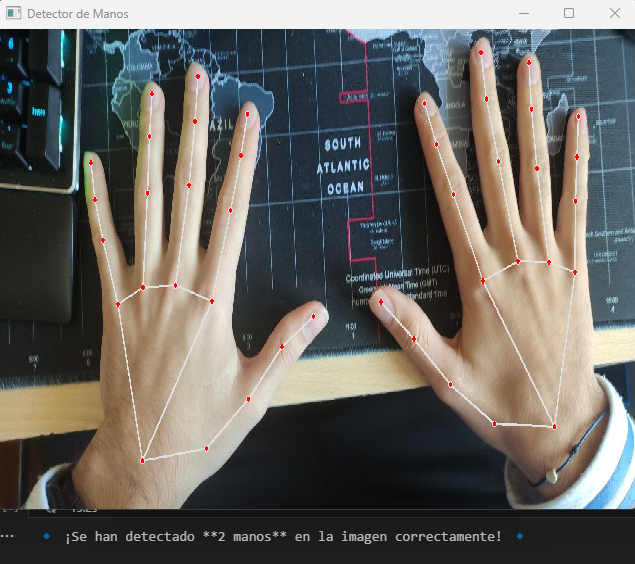

Observamos que el código si es correcto pero únicamente funciona con manos sin ningún filtro

# Resaltamos zonas sucias

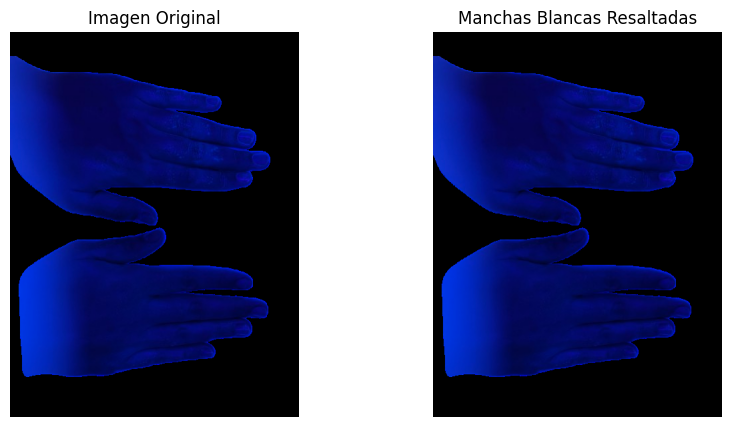

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "D:\Documentos Richard\Estudios\MASTER\TFM\9aa-removebg-preview.png"
image = cv2.imread(image_path)

# Convertir a espacio de color HSV para resaltar áreas blancas
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir rango de color para detectar zonas blancas
lower_white = np.array([0, 0, 180], dtype=np.uint8)  # Umbral inferior
upper_white = np.array([180, 60, 255], dtype=np.uint8)  # Umbral superior

# Crear máscara para filtrar zonas blancas
mask = cv2.inRange(hsv, lower_white, upper_white)

# Aplicar la máscara a la imagen original
result = cv2.bitwise_and(image, image, mask=mask)

# Encontrar contornos de las manchas blancas
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen original
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con las manchas resaltadas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Manchas Blancas Resaltadas")
plt.axis("off")

plt.show()




Probamos a resaltar las zonas sucias buscando un color similar como la escalara de colores es similar buscamos hacerlo transformando la imagen en blanco y negro

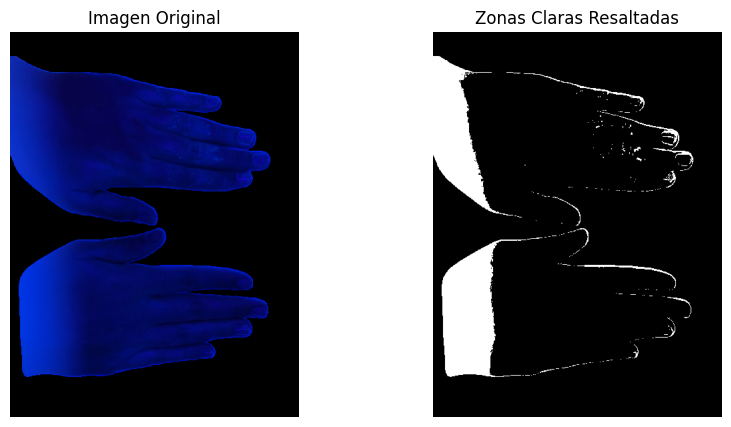

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargamos la imagen
image_path = "D:\Documentos Richard\Estudios\MASTER\TFM\9aa-removebg-preview.png"
image = cv2.imread(image_path)

# VVerificamos si la imagen cargo
if image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta del archivo.")

# Convertimos a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicamos una ecualización de histograma para mejorar el contraste
equalized = cv2.equalizeHist(gray)

# Aplicamos un umbral para resaltar las zonas más claras
_, thresholded = cv2.threshold(equalized, 200, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la procesada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(thresholded, cmap="gray")
axes[1].set_title("Zonas Claras Resaltadas")
axes[1].axis("off")

plt.show()


# Generador de coordenas

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Inicializar Mediapipe Hands con parámetros mejorados
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.9)  # Bajamos el umbral

mp_drawing = mp.solutions.drawing_utils  # Para dibujar las manos

# Cargar la imagen
image_path = "D:\Documentos Richard\Estudios\MASTER\TFM\imagenes\Manos.png"  
image = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("⚠ Error: No se pudo cargar la imagen. Verifica la ruta.")
    exit()

# Obtener dimensiones originales
height, width = image.shape[:2]

# 🔹 Convertir a RGB solo para MediaPipe
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 🔹 Detectamos las manos en la imagen original
results = hands.process(image_rgb)

# 🔹 Convertimos de vuelta a BGR antes de dibujar (para OpenCV)
image_bgr = image.copy()

# Contador de manos detectadas
num_hands = 0

# Dibujar las manos detectadas en la imagen y obtener coordenadas
if results.multi_hand_landmarks:
    num_hands = len(results.multi_hand_landmarks)
    for i, hand_landmarks in enumerate(results.multi_hand_landmarks):
        mp_drawing.draw_landmarks(image_bgr, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        print(f"✋ Coordenadas de la mano {i+1}:")
        for idx, landmark in enumerate(hand_landmarks.landmark):
            x, y = int(landmark.x * width), int(landmark.y * height)
            print(f"Punto {idx}: ({x}, {y})")

# 🔹 Ajustar la ventana para evitar recortes
cv2.namedWindow('Detector de Manos', cv2.WINDOW_NORMAL)

# 🔹 Mostrar la imagen con las manos detectadas
cv2.imshow('Detector de Manos', image_bgr)

# 🔹 Mensaje en consola sobre detección
if num_hands == 0:
    print("⚠ No se detectaron manos en la imagen.")
    print("🔍 Prueba aumentando `min_detection_confidence` o usando otra imagen.")
elif num_hands == 1:
    print("✅ Se detectó **1 mano** en la imagen.")
elif num_hands == 2:
    print("🔹 ¡Se han detectado **2 manos** en la imagen correctamente! 🔹")

cv2.waitKey(0)
cv2.destroyAllWindows()


✋ Coordenadas de la mano 1:
Punto 0: (554, 406)
Punto 1: (495, 411)
Punto 2: (452, 376)
Punto 3: (415, 335)
Punto 4: (381, 297)
Punto 5: (487, 283)
Punto 6: (460, 212)
Punto 7: (442, 164)
Punto 8: (430, 129)
Punto 9: (521, 267)
Punto 10: (501, 188)
Punto 11: (487, 131)
Punto 12: (479, 89)
Punto 13: (550, 265)
Punto 14: (536, 184)
Punto 15: (528, 128)
Punto 16: (525, 83)
Punto 17: (574, 271)
Punto 18: (575, 207)
Punto 19: (575, 162)
Punto 20: (577, 124)
✅ Se detectó **1 mano** en la imagen.


KeyboardInterrupt: 

Gracias a los puntos de hand market podemos buscar las coordenadas (aunque este codigo fue generado para la segunda entrega)